In [ ]:
#Submitted https://www.kaggle.com/jameslindseyjones/obesityrisk-xgboost

In [100]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [80]:
train_data_df = pd.read_csv("data/train_obesity.csv")
train_data_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [81]:
#What are the classification categories?
print(train_data_df['NObeyesdad'].unique())

['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


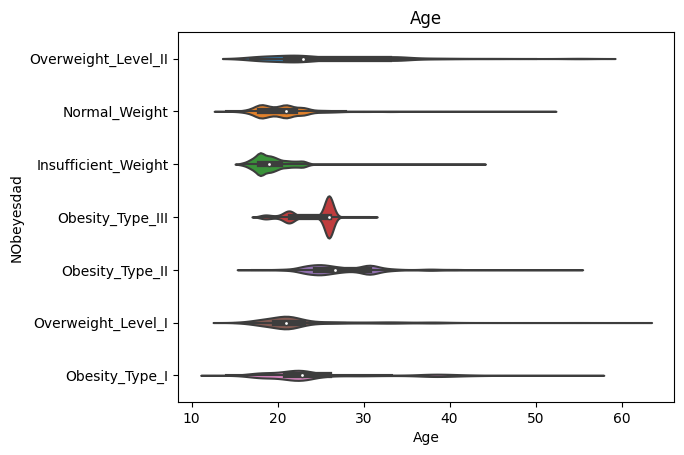

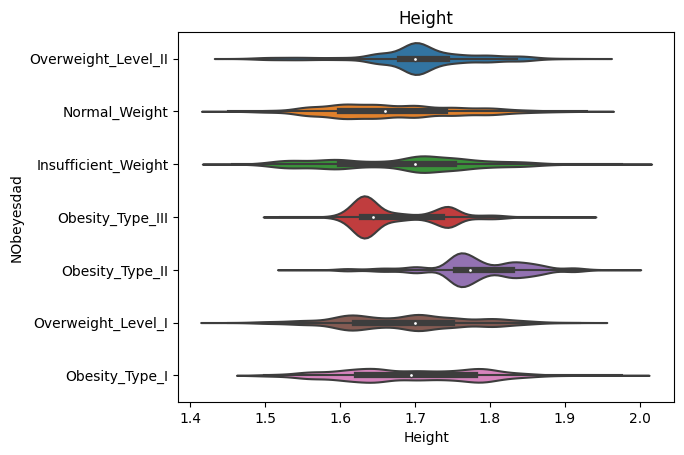

In [82]:
#What are the classification categories?
classification_categories = train_data_df['NObeyesdad'].unique()
print(classification_categories)


#Plots of a couple of the numerical columns
for i, col in enumerate(['Age', 'Height']):
    plt.figure(col)
    plt.title(col)
    sns.violinplot(x=col,y='NObeyesdad', order=classification_categories, data=train_data_df)


In [83]:
#Need to one-hot encode some columns so they may be passed into an ML model.
variables_for_encoding = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']
df = pd.get_dummies(data = train_data_df,
                         prefix = variables_for_encoding,
                         columns = variables_for_encoding)
df.head()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,Overweight_Level_II,...,1,0,0,1,0,0,0,0,1,0
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,Normal_Weight,...,1,0,0,0,1,1,0,0,0,0
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,Insufficient_Weight,...,1,0,0,0,1,0,0,0,1,0
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,Obesity_Type_III,...,1,0,0,1,0,0,0,0,1,0
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,Overweight_Level_II,...,1,0,0,1,0,0,0,0,1,0


In [84]:
#encode the target variable
df['NObeyesdad'] = LabelEncoder().fit_transform(df['NObeyesdad'])
df['NObeyesdad'].head()

0    6
1    1
2    0
3    4
4    6
Name: NObeyesdad, dtype: int32

In [85]:
features = [x for x in df.columns if x not in 'NObeyesdad'] ## Removing target variable
features

['id',
 'Age',
 'Height',
 'Weight',
 'FCVC',
 'NCP',
 'CH2O',
 'FAF',
 'TUE',
 'Gender_Female',
 'Gender_Male',
 'family_history_with_overweight_no',
 'family_history_with_overweight_yes',
 'FAVC_no',
 'FAVC_yes',
 'CAEC_Always',
 'CAEC_Frequently',
 'CAEC_Sometimes',
 'CAEC_no',
 'SMOKE_no',
 'SMOKE_yes',
 'SCC_no',
 'SCC_yes',
 'CALC_Frequently',
 'CALC_Sometimes',
 'CALC_no',
 'MTRANS_Automobile',
 'MTRANS_Bike',
 'MTRANS_Motorbike',
 'MTRANS_Public_Transportation',
 'MTRANS_Walking']

In [86]:
RANDOM_STATE = 1 #For reproducible results
#Split data to create a cross validation dataset.
X_train, X_val, y_train, y_val = train_test_split(df[features], df['NObeyesdad'], train_size = 0.8, random_state = RANDOM_STATE)
print(len(X_train))
print(len(X_val))

16606
4152


In [160]:
#Random Forest
min_samples_split_list = [2, 10, 30, 50, 100, 200, 500]             
max_depth_list = [2, 4, 8, 16, 32, 64, None]
best_val_accuracy_score = 0


In [162]:
for i in range(len(min_samples_split_list)):
    for j in range(len(max_depth_list)):
        model = RandomForestClassifier(min_samples_split = min_samples_split_list[i],
                                       max_depth = max_depth_list[j],
                                       n_estimators = 50,
                                       random_state = RANDOM_STATE).fit(X_train,y_train) 
        predictions_val = model.predict(X_val) ## The predicted values for the validation dataset
        score = accuracy_score(predictions_val,y_val)
        if (score > best_val_accuracy_score):
            best_val_accuracy_score = score
            optimal_min_samples = min_samples_split_list[i]
            optimal_max_depth = max_depth_list[j]


Highest Accuracy 0.8923410404624278 2 32


In [166]:
print("Highest Accuracy:", best_val_accuracy_score, "Optimal min samples:", optimal_min_samples, "Optimal max depth:", optimal_max_depth)

Highest Accuracy: 0.8923410404624278 Optimal min samples: 2 Optimal max depth: 32


In [95]:
#Try XGBoost
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]
xgb_model = XGBClassifier(n_estimators = 1000, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE, early_stopping_rounds = 10)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-mlogloss:1.69582
[1]	validation_0-mlogloss:1.51199
[2]	validation_0-mlogloss:1.36752
[3]	validation_0-mlogloss:1.24848
[4]	validation_0-mlogloss:1.14839
[5]	validation_0-mlogloss:1.06290
[6]	validation_0-mlogloss:0.98861
[7]	validation_0-mlogloss:0.92292
[8]	validation_0-mlogloss:0.86556
[9]	validation_0-mlogloss:0.81466
[10]	validation_0-mlogloss:0.77016
[11]	validation_0-mlogloss:0.72936
[12]	validation_0-mlogloss:0.69231
[13]	validation_0-mlogloss:0.65948
[14]	validation_0-mlogloss:0.62858
[15]	validation_0-mlogloss:0.60141
[16]	validation_0-mlogloss:0.57659
[17]	validation_0-mlogloss:0.55491
[18]	validation_0-mlogloss:0.53473
[19]	validation_0-mlogloss:0.51618
[20]	validation_0-mlogloss:0.49838
[21]	validation_0-mlogloss:0.48198
[22]	validation_0-mlogloss:0.46737
[23]	validation_0-mlogloss:0.45403
[24]	validation_0-mlogloss:0.44186
[25]	validation_0-mlogloss:0.43095
[26]	validation_0-mlogloss:0.42113
[27]	validation_0-mlogloss:0.41201
[28]	validation_0-mlogloss:0.4

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=1, reg_alpha=0, ...)

In [96]:
xgb_model.best_iteration

127

In [97]:
accuracy_score(xgb_model.predict(X_train), y_train)

0.954233409610984

In [167]:
accuracy_score(xgb_model.predict(X_val),y_val)

0.9048651252408478